In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [ ]:
import pandas as pd


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pip install lightgbm

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train_oil.csv') #Train Data

In [ ]:
t= train = pd.read_csv('/content/drive/MyDrive/train_oil.csv')
y_train=t["Onshore/Offshore"]

In [ ]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/oil_test.csv') #Test data
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [ ]:
train.shape

(309, 20)

In [ ]:
test.shape

(133, 19)

In [ ]:
test.shape

(133, 19)

In [ ]:
train.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Onshore/Offshore', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
test.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Depth',
       'Reservoir period', 'Lithology', 'Thickness (gross average ft)',
       'Thickness (net pay average ft)', 'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

In [ ]:
test.isna().sum()

Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name                         8
Tectonic regime                    0
Latitude                          13
Longitude                         16
Operator company                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

In [ ]:
import seaborn as sns

<ipython-input-21-277a2a71ce9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Latitude'], bins=10)


<Axes: xlabel='Latitude', ylabel='Density'>

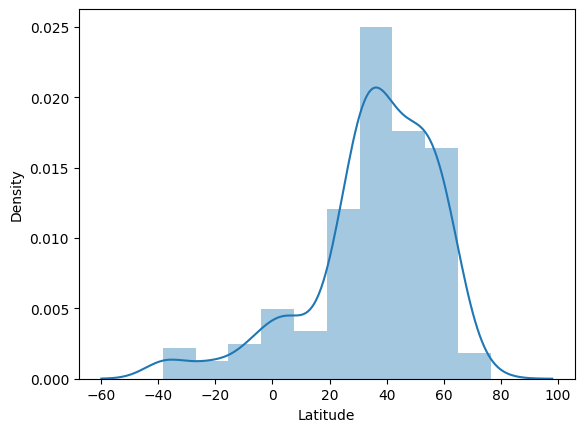

In [ ]:
sns.distplot(train['Latitude'], bins=10)

In [ ]:
train.describe()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,282.00000,279.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,35.62426,-12.508435,6755.669903,760.087379,183.683236,17.825178,476.994757
std,22.19116,86.387220,3628.094135,1353.934404,282.252489,7.171048,1000.140605
min,-38.39890,-151.615300,220.000000,11.000000,2.120000,1.100000,0.010000
25%,28.24915,-102.336500,4059.000000,128.000000,45.000000,12.000000,10.000000
50%,38.13500,1.810000,6500.000000,312.000000,110.000000,17.000000,68.000000
75%,52.13360,56.179900,9186.000000,715.000000,205.000000,23.600000,390.000000
max,76.44620,148.417000,19888.000000,8200.000000,2976.000000,35.000000,7500.000000


**we can see most of the latitude is between 28to52 in 1st and 3rd quartile**

In [ ]:
#lets put the mean value in null spaces of latitude
mean_value=train["Latitude"].mean()
train["Latitude"].fillna(value=mean_value, inplace=True)

In [ ]:
mean_value=test["Latitude"].mean()
test["Latitude"].fillna(value=mean_value, inplace=True)

<ipython-input-25-b6717d371eb2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Longitude'], bins=10)


<Axes: xlabel='Longitude', ylabel='Density'>

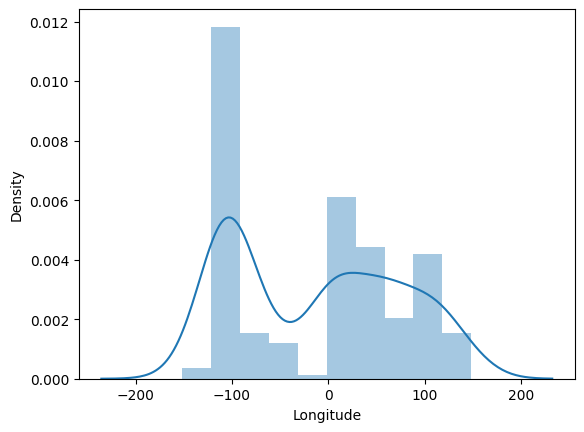

In [ ]:
#lets see longitude too
sns.distplot(train['Longitude'], bins=10)

In [ ]:
train["Longitude"].mean()
#by seeing graph we can see that graph is not oriented towards mean lets try another things
#we can see max no are between -102to56 so we will fill null values no between them i.e i will fillin 30

-12.508434587813621

In [ ]:
train["Longitude"].fillna(value=-30, inplace=True)

In [ ]:
test["Longitude"].fillna(value=-30, inplace=True)

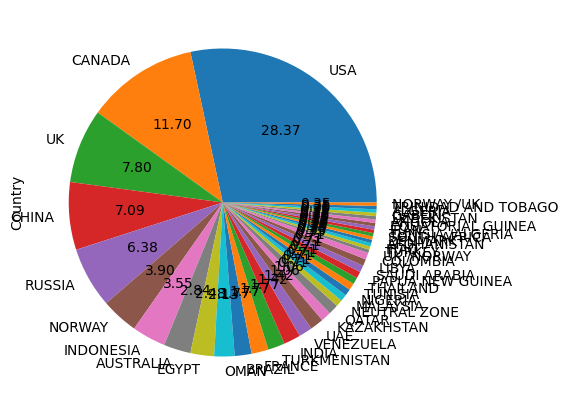

In [ ]:
#lets fill country null values now
plt.figure(figsize=(8,5))

train['Country'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [ ]:
#we can see most occuring countrys are usa,canada,uk
#so we will fill this by USA
train["Country"].fillna(value="USA", inplace=True)

In [ ]:
test["Country"].fillna(value="USA", inplace=True)

In [ ]:
train["Region"].mode()

0    NORTH AMERICA
Name: Region, dtype: object

In [ ]:
#so most occurin in this north america we will it by this only
train["Region"].fillna(value="NORTH AMERICA", inplace=True)

In [ ]:
test["Region"].mode()
test["Region"].fillna(value="NORTH AMERICA", inplace=True)

<ipython-input-35-4408692ca65b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Basin name',data=train, palette='rainbow')


<Axes: xlabel='Basin name', ylabel='count'>

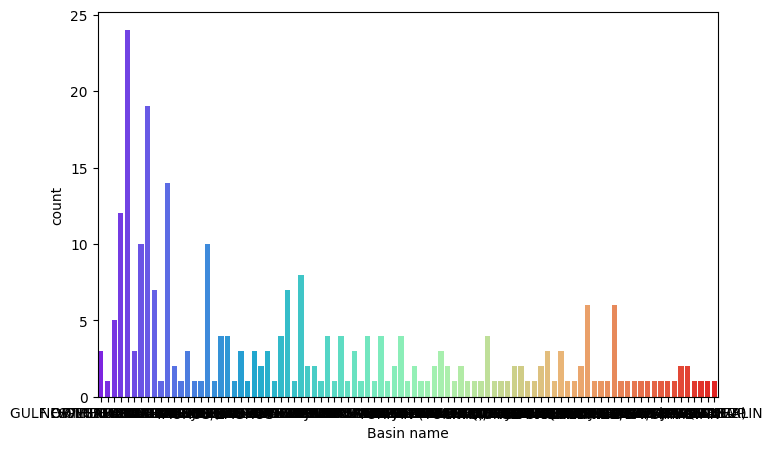

In [ ]:
#train["Basin name"]
plt.figure(figsize=(8,5))

sns.countplot(x='Basin name',data=train, palette='rainbow')

In [ ]:
train["Basin name"].mode()

0    WESTERN CANADA
Name: Basin name, dtype: object

In [ ]:
train["Basin name"].fillna(value="WESTERN CANADA", inplace=True)

In [ ]:
test.isna().sum()

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        8
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

In [ ]:
train.isna().sum()

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

<ipython-input-40-0d06f2a5abc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country',data=train, palette='rainbow')


<Axes: xlabel='Country', ylabel='count'>

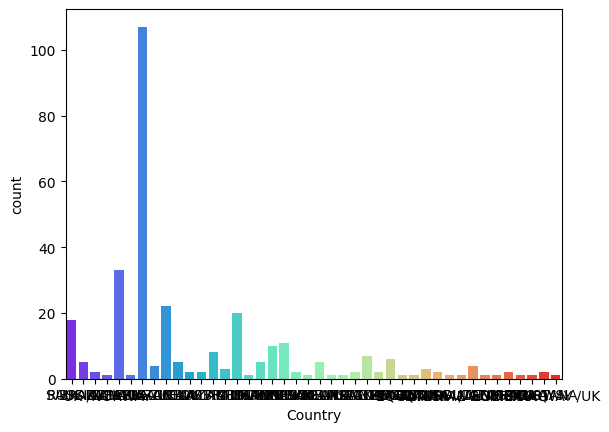

In [ ]:
#so we have fill all the missing values Now lets visualize our data with output
sns.countplot(x='Country',data=train, palette='rainbow')

<ipython-input-41-a724b87ca998>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country',y='Longitude',data=train, palette='rainbow')


<Axes: xlabel='Country', ylabel='Longitude'>

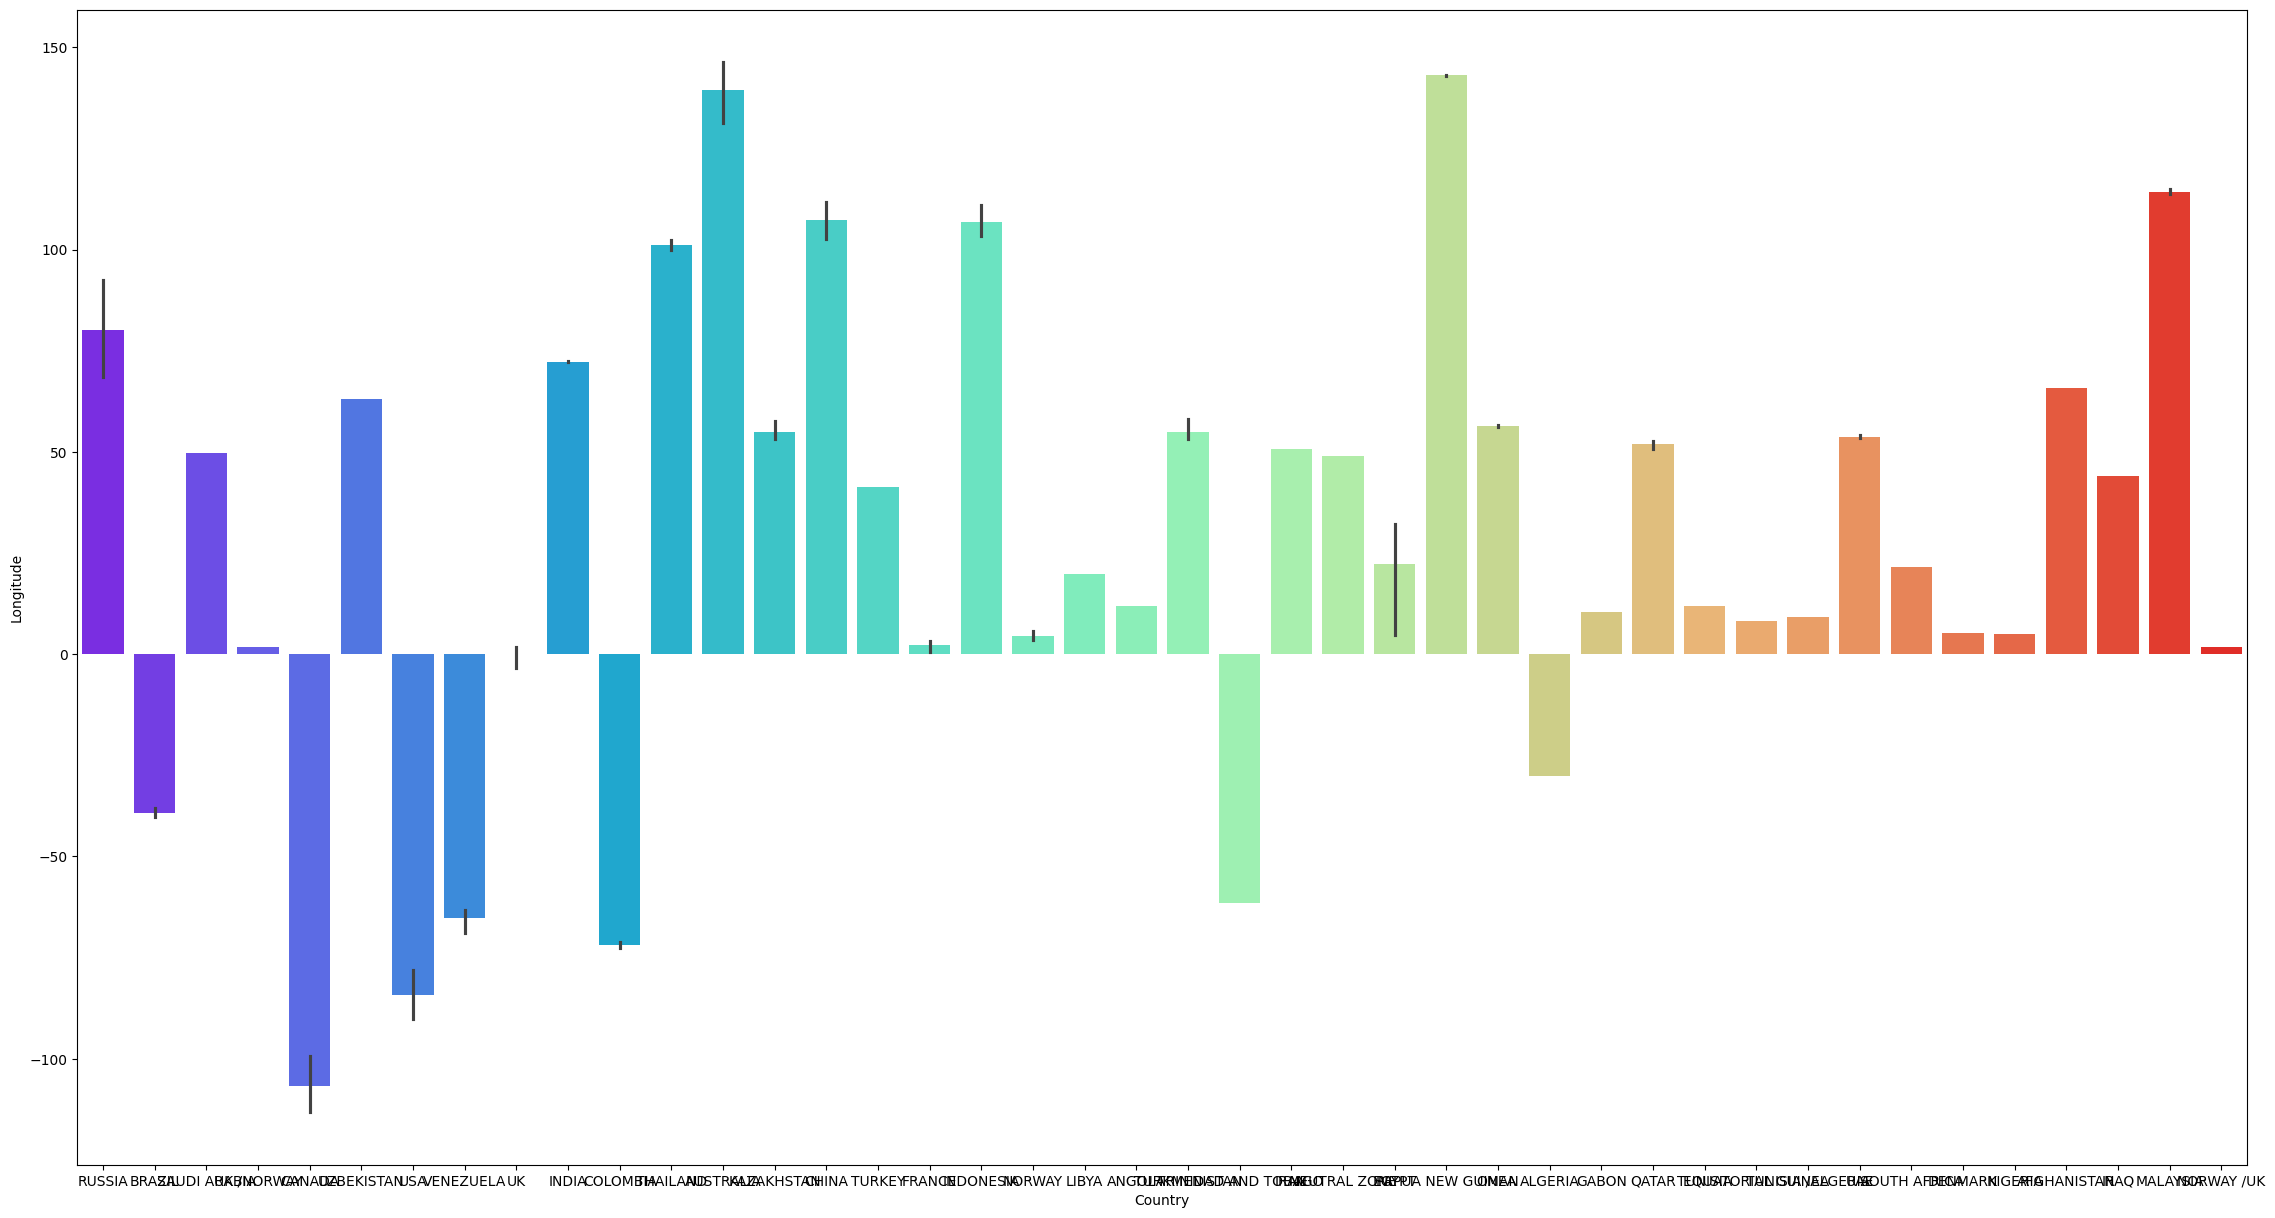

In [ ]:
plt.figure(figsize=(28,15))

sns.barplot(x='Country',y='Longitude',data=train, palette='rainbow')
#plt.figure(figsize=(8,5))

In [ ]:
train.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Onshore/Offshore', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

<Axes: ylabel='Onshore/Offshore'>

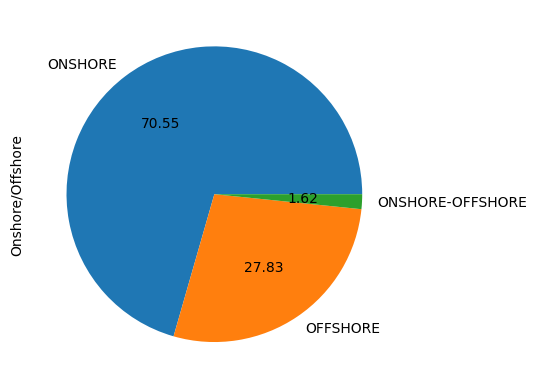

In [ ]:
train['Onshore/Offshore'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Onshore/Offshore'>

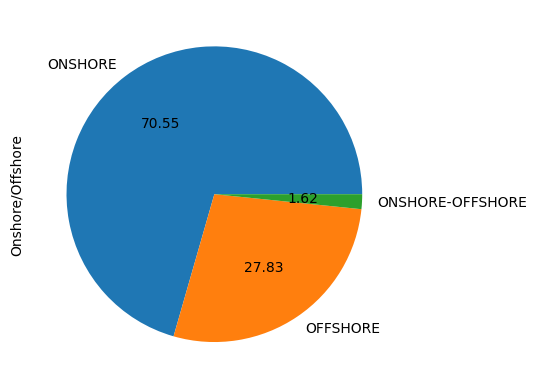

In [ ]:
y_train.value_counts().plot(kind='pie', autopct='%.2f')

In [ ]:
#some how oyr data is clean now of output
#now lets change the catagorical data into numerical data
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
def drop_col(df):
    df=df.drop(["Field name","Reservoir unit","Country","Region","Basin name","Operator company","Tectonic regime"],axis=1,inplace=True)
    return df

In [ ]:
test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [ ]:
drop_col(train)

In [ ]:
drop_col(test)

In [ ]:
#=train["Onshore/Offshore"]
y_train.head()

0     ONSHORE
1     ONSHORE
2     ONSHORE
3    OFFSHORE
4     ONSHORE
Name: Onshore/Offshore, dtype: object

In [ ]:
#now drop output too
train.drop("Onshore/Offshore",axis=1,inplace=True)

In [ ]:
train.columns

Index(['Latitude', 'Longitude', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
test.columns

Index(['Latitude', 'Longitude', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')

In [ ]:
#we left with 5 clumns as catogorical data lets start with y_train
y_train.replace(['OFFSHORE', 'ONSHORE','ONSHORE-OFFSHORE'],
                        [0, 1,2], inplace=True)

In [ ]:
y_train

0      1
1      1
2      1
3      0
4      1
      ..
304    1
305    1
306    1
307    1
308    1
Name: Onshore/Offshore, Length: 309, dtype: int64

In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


<Axes: ylabel='Hydrocarbon type'>

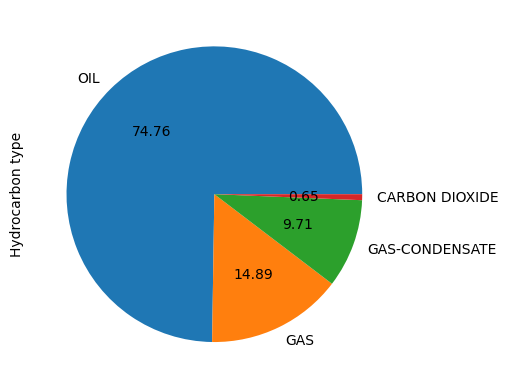

In [ ]:
train['Hydrocarbon type'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Structural setting'>

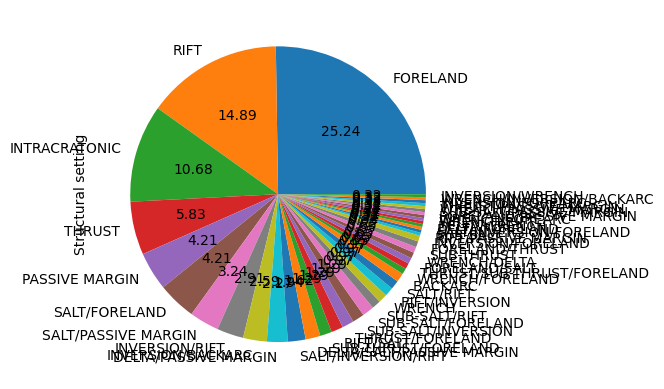

In [ ]:
train['Structural setting'].value_counts().plot(kind='pie', autopct='%.2f')

In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


<Axes: ylabel='Reservoir status'>

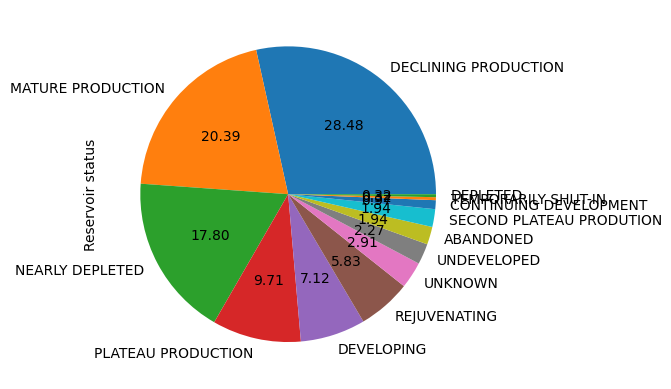

In [ ]:
train['Reservoir status'].value_counts().plot(kind='pie', autopct='%.2f')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
train.head()


,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
cols = ['Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Reservoir period','Lithology'] # # Encode labels of multiple columns at once #
train[cols] = train[cols].apply(LabelEncoder().fit_transform) # # Print head # df.head()

In [ ]:
train.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,3,2,5,1870,2,7,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,3,6,15,4843,14,7,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,3,8,5,6050,9,5,250.0,184.0,21.0,410.0
3,61.3833,1.7500,3,6,16,8988,9,7,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,3,12,5,9306,6,3,233.0,167.0,11.8,1407.0


In [ ]:
cols = ['Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Reservoir period','Lithology'] # # Encode labels of multiple columns at once #
test[cols] = test[cols].apply(LabelEncoder().fit_transform) # # Print head # df.head(

In [ ]:
test.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,29.7422,28.4925,2,3,18,10282,5,11,745.0,144.0,10.0,8.0
1,31.4382,31.3616,1,1,33,10499,9,11,509.0,410.0,20.0,300.0
2,48.4740,57.6667,4,2,24,6000,2,9,300.0,105.0,10.0,20.0
3,60.7833,1.7333,4,4,18,9790,8,11,886.0,344.0,17.0,500.0
4,21.6000,72.9167,4,3,36,2950,11,11,670.0,0.0,21.0,250.0


In [ ]:
# make a copy of dataframe
df = train.copy()
df.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,3,2,5,1870,2,7,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,3,6,15,4843,14,7,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,3,8,5,6050,9,5,250.0,184.0,21.0,410.0
3,61.3833,1.7500,3,6,16,8988,9,7,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,3,12,5,9306,6,3,233.0,167.0,11.8,1407.0


In [ ]:
df_test= test.copy()
df_test.head()

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,29.7422,28.4925,2,3,18,10282,5,11,745.0,144.0,10.0,8.0
1,31.4382,31.3616,1,1,33,10499,9,11,509.0,410.0,20.0,300.0
2,48.4740,57.6667,4,2,24,6000,2,9,300.0,105.0,10.0,20.0
3,60.7833,1.7333,4,4,18,9790,8,11,886.0,344.0,17.0,500.0
4,21.6000,72.9167,4,3,36,2950,11,11,670.0,0.0,21.0,250.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cat_col = ['Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Reservoir period','Lithology']
num_col = list(df.drop([*cat_col], axis = 1).columns)
col_transf = ColumnTransformer([
                                ('num_scaling1', StandardScaler(), num_col),
])

In [ ]:
 df=col_transf.fit_transform(df)
#scaled_features = pd.DataFrame(features, columns = col_names)

In [ ]:
 df_test=col_transf.fit_transform(df_test)

In [ ]:
df_test = pd.DataFrame(df_test, columns = num_col)
df_test.head()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,-0.286676,0.390083,1.169945,-0.059150,-0.204431,-0.976561,-0.422213
1,-0.200188,0.423220,1.233442,-0.204026,0.740327,0.218245,-0.145459
2,0.668553,0.727033,-0.083020,-0.332328,-0.342948,-0.976561,-0.410840
3,1.296266,0.081024,1.025980,0.027408,0.505913,-0.140197,0.044099
4,-0.701888,0.903165,-0.975488,-0.105191,-0.715879,0.337726,-0.192848


In [ ]:
df = pd.DataFrame(df, columns = num_col)
df.head()

,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,0.726578,0.718743,-1.348806,-0.368478,-0.534726,0.862473,-0.447657
1,-2.609693,-0.312127,-0.528038,1.015662,-0.396327,0.722798,-0.127183
2,-0.451012,0.779713,-0.194817,-0.377356,0.001124,0.443446,-0.067094
3,1.217239,0.194349,0.616288,-0.247893,0.412770,0.583122,0.273410
4,0.831895,-1.237401,0.704080,-0.389932,-0.059203,-0.841572,0.931383


In [ ]:
x1=train.copy()

In [ ]:
x1_test=test.copy()
x2_test=df_test.copy()

In [ ]:
x2=df.copy()

In [ ]:
x1['Latitude']=x2['Latitude']
x1['Longitude']=x2['Longitude']
x1['Depth']=x2['Depth']
x1['Thickness (gross average ft)']=x2['Thickness (gross average ft)']
x1['Thickness (net pay average ft)']=x2['Thickness (net pay average ft)']
x1['Porosity']=x2['Porosity']
x1['Permeability']=x2['Permeability']

In [ ]:
x1_test['Latitude']=x2_test['Latitude']
x1_test['Longitude']=x2_test['Longitude']
x1_test['Depth']=x2_test['Depth']
x1_test['Thickness (gross average ft)']=x2_test['Thickness (gross average ft)']
x1_test['Thickness (net pay average ft)']=x2_test['Thickness (net pay average ft)']
x1_test['Porosity']=x2_test['Porosity']
x1_test['Permeability']=x2_test['Permeability']

In [ ]:
x1_test

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,-0.286676,0.390083,2,3,18,1.169945,5,11,-0.059150,-0.204431,-0.976561,-0.422213
1,-0.200188,0.423220,1,1,33,1.233442,9,11,-0.204026,0.740327,0.218245,-0.145459
2,0.668553,0.727033,4,2,24,-0.083020,2,9,-0.332328,-0.342948,-0.976561,-0.410840
3,1.296266,0.081024,4,4,18,1.025980,8,11,0.027408,0.505913,-0.140197,0.044099
4,-0.701888,0.903165,4,3,36,-0.975488,11,11,-0.105191,-0.715879,0.337726,-0.192848
...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.130183,1.428864,4,4,18,-0.091799,10,6,-0.172718,-0.424638,-1.872665,-0.421834
129,-0.016203,-1.315597,4,4,34,1.409302,9,14,-0.393716,-0.183121,0.218245,-0.358711
130,0.145140,1.413003,4,3,18,-0.263270,11,11,-0.375299,-0.470810,1.018765,1.344468
131,0.145140,1.413003,4,1,18,-0.457271,11,11,-0.415816,-0.495672,0.600583,-0.315113


In [ ]:
x1

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,0.726578,0.718743,3,2,5,-1.348806,2,7,-0.368478,-0.534726,0.862473,-0.447657
1,-2.609693,-0.312127,3,6,15,-0.528038,14,7,1.015662,-0.396327,0.722798,-0.127183
2,-0.451012,0.779713,3,8,5,-0.194817,9,5,-0.377356,0.001124,0.443446,-0.067094
3,1.217239,0.194349,3,6,16,0.616288,9,7,-0.247893,0.412770,0.583122,0.273410
4,0.831895,-1.237401,3,12,5,0.704080,6,3,-0.389932,-0.059203,-0.841572,0.931383
...,...,...,...,...,...,...,...,...,...,...,...,...
304,-1.967589,1.912814,2,1,32,0.869448,10,7,-0.199807,0.199850,-1.092988,-0.377553
305,1.929033,-1.153560,1,11,5,-0.929174,9,7,-0.488324,-0.399876,0.303770,0.089137
306,0.220951,-1.169306,3,5,5,2.345063,14,7,5.355988,1.388656,-1.791367,-0.477601
307,0.447959,-1.107026,3,6,5,-0.677946,4,7,-0.529012,-0.570212,1.491015,1.775632


**Now our dataset is ready to train**

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(x1,y_train, train_size=0.7)

In [ ]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((216, 12), (93, 12), (216,), (93,))

In [ ]:
ytrain

230    0
264    1
176    0
119    1
172    1
      ..
38     1
33     1
255    0
166    1
185    2
Name: Onshore/Offshore, Length: 216, dtype: int64

In [ ]:
#try another model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(xtrain, ytrain)

SGDClassifier(random_state=42)

In [ ]:
y_pred1 = sgd_clf.predict(xval)

In [ ]:
score = y_pred1 == yval               # correct prediction = True, incorrect prediction = False
accuracy = score.sum() / y_pred1.size    # score.sum() = count the total num of True (correct prediction)
print(accuracy)
#the rediction is no that much good so we have to hypertune over model

0.7204301075268817


In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(yval, y_pred1)
conf_mat

array([[ 2, 24,  1],
       [ 0, 65,  0],
       [ 0,  1,  0]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
y_pred2=dt.predict(xval)

In [ ]:
score = y_pred2 == yval               # correct prediction = True, incorrect prediction = False
accuracy = score.sum() / y_pred2.size    # score.sum() = count the total num of True (correct prediction)
print(accuracy)
#the rediction is no that much good so we have to hypertune over model
#so this is the best model we gain so far

0.7956989247311828


In [ ]:
conf_mat = metrics.confusion_matrix(yval, y_pred2)
conf_mat

array([[18,  8,  1],
       [ 8, 56,  1],
       [ 1,  0,  0]])

In [ ]:
#now predict in out test cases
y_ans=dt.predict(x1_test)

In [ ]:
y_ans

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1])

In [ ]:
df1=pd.DataFrame({"Onshore/Offshore":y_ans});df1.index.name="index"
df1

,Onshore/Offshore
index,
0,1
1,1
2,1
3,0
4,1
...,...
128,1
129,2
130,1


In [ ]:
df1["Onshore/Offshore"]=df1["Onshore/Offshore"].replace({0:"OFFSHORE",1:"ONSHORE",2:"ONSHORE/OFFSHORE"});df1

,Onshore/Offshore
index,
0,ONSHORE
1,ONSHORE
2,ONSHORE
3,OFFSHORE
4,ONSHORE
...,...
128,ONSHORE
129,ONSHORE/OFFSHORE
130,ONSHORE


**Here's a brief explanation**


1.   Onshore: This category  represents oil fields or reservoirs that are located on land.

2. Offshore: This category  represents oil fields or reservoirs that are located offshore, typically in the ocean.

3. Onshore/Offshore: This category  represents oil fields or reservoirs that have characteristics of both onshore and offshore locations, possibly referring to fields that extend from onshore to offshore.

1. 0 corresponds to "OFFSHORE"
2. 1 corresponds to "ONSHORE"
3. 2 corresponds to "ONSHORE/OFFSHORE"


**The Code below evaluates the performance of the above Decision Tree Model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Confusion matrix for Decision Tree on validation set
conf_mat_val = confusion_matrix(yval, y_pred2)
print("Confusion Matrix (Validation Set):")
print(conf_mat_val)

# Performance Metrics for Decision Tree on validation set
accuracy_val = accuracy_score(yval, y_pred2)
precision_val = precision_score(yval, y_pred2, average='weighted')
recall_val = recall_score(yval, y_pred2, average='weighted')

print("Performance Metrics (Validation Set):")
print("Accuracy: {:.2f}".format(accuracy_val))
print("Precision: {:.2f}".format(precision_val))
print("Recall: {:.2f}".format(recall_val))


Confusion Matrix (Validation Set):
[[18  8  1]
 [ 8 56  1]
 [ 1  0  0]]
Performance Metrics (Validation Set):
Accuracy: 0.80
Precision: 0.81
Recall: 0.80


**Building a nueronetwork**




In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (OFFSHORE, ONSHORE, ONSHORE/OFFSHORE)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xval, yval))


Epoch 1/10
7/7 [==============================] - 3s 37ms/step - loss: 3.3471 - accuracy: 0.1574 - val_loss: 1.8436 - val_accuracy: 0.5269
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 1.7772 - accuracy: 0.5648 - val_loss: 1.0859 - val_accuracy: 0.5591
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.9760 - accuracy: 0.5972 - val_loss: 0.8966 - val_accuracy: 0.6559
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.8102 - accuracy: 0.7130 - val_loss: 0.8431 - val_accuracy: 0.6989
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7347 - accuracy: 0.7176 - val_loss: 0.6709 - val_accuracy: 0.7097
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6356 - accuracy: 0.6991 - val_loss: 0.5938 - val_accuracy: 0.6667
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6118 - accuracy: 0.6991 - val_loss: 0.5688 - val_accuracy: 0.7634
Epoch 8/10
7/7 [==============

In [ ]:
import numpy as np

# Make predictions on the validation set
y_pred_nn_probabilities = model.predict(xval)
y_pred_nn = np.argmax(y_pred_nn_probabilities, axis=1)

# Convert ON/OFF/ON-OFF classes to 0, 1, 2
yval_encoded = yval.replace({'OFFSHORE': 0, 'ONSHORE': 1, 'ONSHORE/OFFSHORE': 2})

# Calculate metrics
accuracy_nn = accuracy_score(yval_encoded, y_pred_nn)
precision_nn = precision_score(yval_encoded, y_pred_nn, average='weighted')
recall_nn = recall_score(yval_encoded, y_pred_nn, average='weighted')

print("Neural Network Metrics:")
print("Accuracy: {:.2f}".format(accuracy_nn))
print("Precision: {:.2f}".format(precision_nn))
print("Recall: {:.2f}".format(recall_nn))


3/3 [==============================] - 0s 5ms/step
Neural Network Metrics:
Accuracy: 0.75
Precision: 0.74
Recall: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import time
import numpy as np

# Measure response time for Decision Tree
start_time_dt = time.time()
y_pred_dt = dt.predict(xval)
end_time_dt = time.time()
response_time_dt = end_time_dt - start_time_dt

# Measure response time for Neural Network
start_time_nn = time.time()
y_pred_nn_probabilities = model.predict(xval)
y_pred_nn = np.argmax(y_pred_nn_probabilities, axis=1)
end_time_nn = time.time()
response_time_nn = end_time_nn - start_time_nn

print("Response Time Metrics:")
print("Decision Tree Response Time: {:.6f} seconds".format(response_time_dt))
print("Neural Network Response Time: {:.6f} seconds".format(response_time_nn))


3/3 [==============================] - 0s 6ms/step
Response Time Metrics:
Decision Tree Response Time: 0.010848 seconds
Neural Network Response Time: 0.156581 seconds
